## Wczytanie danych

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np

from keras.preprocessing.image import img_to_array

In [8]:
def read_img(img_path, show=False):
    img = tf.keras.preprocessing.image.load_img(img_path)
    if show is True:
        plt.imshow(img)
        plt.show()
    return img


root = os.getcwd()

train_dir = os.path.join(root, r'data\train')
test_dir = os.path.join(root, r'data\val')
print(train_dir)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(256, 256),
  batch_size=32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(256, 256),
  batch_size=32)

c:\Users\kacpe\Desktop\StudiaS5\AnimalRecognition\data\train
Found 14630 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


## Przykładowe wczytanie zdjęcia

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


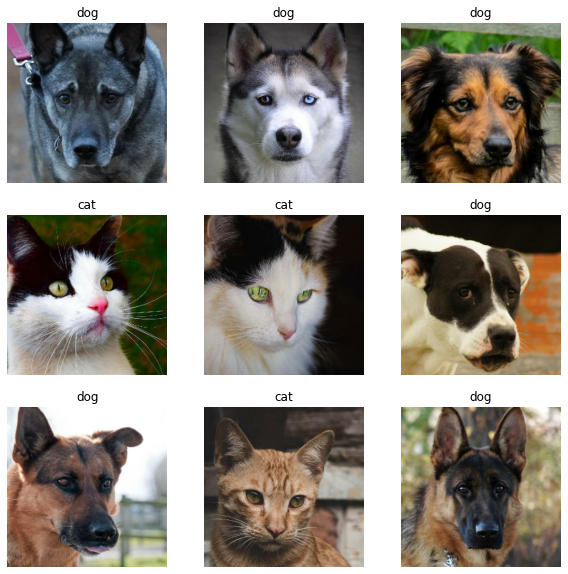

In [26]:
class_names = train_ds.class_names
# print(class_names)

print(train_ds.take(1))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [30]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [37]:
num_classes = len(class_names)

model = tf.keras.layers.experimental.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

AttributeError: module 'tensorflow.keras.layers.experimental' has no attribute 'Sequential'